# EP.SV3 (Environmental Pollution Domain, Structural Violence Path, Modern Time Frame)


## Main Question Here: Do counties with greater proportion of people racialized as black than the national average face more serious air pollution?

### 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import scipy.stats as stats

## Import Datasets

In [ ]:

# This dataset include the county-level emission of Hazardous Air Pollutant (HAP) information in 2020
emission_data = pd.read_excel("HAP.xlsx")

In [92]:
# This is the main table we are going to use
county_list = pd.read_excel("..\Public Data\VARIABLE for coder X.xlsx")

# This dataset include county-level demographics information in 2020
county_data = pd.read_csv(r"..\Public Data\2020-County-Level-Demographics\DECENNIALDP2020.DP1-Data.csv")


c:\Users\longy\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,

## Get Avg Proportion of People Racialized as Black (As at Least One of Their Ethnicities) Across the Nation in 2020

In [93]:
national_df = pd.read_csv(r"..\Public Data\2020-National-Demographics.csv")
national_black_avg = float(re.findall('(.*)%',national_df.iloc[93,2])[0])
national_black_avg

14.2

## Get County-level Demographics Data: Total Population & Proportion of People Racialized as Black

In [94]:
county_data = county_data[["GEO_ID","NAME", "DP1_0087P","DP1_0001C"]].iloc[1:,:]
county_data["DP1_0087P"]= county_data["DP1_0087P"].astype("float")
county_data=county_data.rename(columns={"DP1_0087P":"Percentage_of_People_Racialized_as_Black",
                                        "DP1_0001C":"Total_Population"})
# county_greater_proportion = county_data[county_data["DP1_0087P"]>national_black_avg]
# county_greater_proportion
county_data.head(5)

,GEO_ID,NAME,Percentage_of_People_Racialized_as_Black,Total_Population
1,0500000US01001,"Autauga County, Alabama",20.9,58805
2,0500000US01003,"Baldwin County, Alabama",9.0,231767
3,0500000US01005,"Barbour County, Alabama",48.6,25223
4,0500000US01007,"Bibb County, Alabama",20.8,22293
5,0500000US01009,"Blount County, Alabama",2.1,59134


# 

# Join this Table (t1) with the Table Dr. AJ Provided (t0)
### In this step, we need to join 2 tables on t0.statefips + t0.countyfips = t1.geo_id somehow. Notice that t1.GEO_ID = 0500000US + t0.statefips + t0.countyfips.

In [95]:
def fips_convert(statefips, countyfips):
    fips = "0500000US"
    if statefips<10:
        fips += "0"+str(statefips)
    else:
        fips += str(statefips)
    if countyfips% 10 ==0  and statefips!= 2 and statefips != 15:
        if countyfips<100:
            fips += "00"+str(int(countyfips/10))
        elif countyfips < 1000:
            fips += "0"+str(int(countyfips/10))
        else:
            fips += str(int(countyfips/10))
    elif countyfips%10 != 0 and statefips!=2 and statefips != 15:
        if countyfips<10:
            fips += "00"+str(countyfips)
        elif countyfips<100:
            fips += "0"+str(countyfips)
        else :
            fips += str(countyfips)
    ## Alaska counties
    elif statefips == 2:
        if countyfips < 10:
            fips += "00"+str(countyfips)
        elif countyfips < 100:
            fips += "0"+str(countyfips)
        else:
            fips += str(countyfips)
    ## Hawaii counties
    elif statefips == 15:
        fips += "00"+str(countyfips)[0]
    return str(fips)

In [96]:
county_list["GEO_ID"]= county_list.apply(lambda x: fips_convert(x["STATEFIPS"],x["COUNTYFIPS"]), axis=1)
# Special Cases
county_list.loc[county_list["ALLCOUNTIES"]=="Carson City","GEO_ID"]="0500000US32510"


In [97]:
county_list=county_list.merge(county_data, on="GEO_ID",how="left" )
county_list.head(5)

,STATE,GISJOIN,STATEICP,STATEFIPS,COUNTYFIPS,ALLCOUNTIES,VARIABLE NAME,GEO_ID,NAME,Percentage_of_People_Racialized_as_Black,Total_Population
0,Alabama,G0100010,41.0,1,10,Autauga,NaN,0500000US01001,"Autauga County, Alabama",20.9,58805
1,Alabama,G0100030,41.0,1,30,Baldwin,NaN,0500000US01003,"Baldwin County, Alabama",9.0,231767
2,Alabama,G0100050,41.0,1,50,Barbour,NaN,0500000US01005,"Barbour County, Alabama",48.6,25223
3,Alabama,G0100070,41.0,1,70,Bibb,NaN,0500000US01007,"Bibb County, Alabama",20.8,22293
4,Alabama,G0100090,41.0,1,90,Blount,NaN,0500000US01009,"Blount County, Alabama",2.1,59134


In [98]:
np.sum(pd.isna(county_list),axis=0)

STATE                                          0
GISJOIN                                        0
STATEICP                                      92
STATEFIPS                                      0
COUNTYFIPS                                     0
ALLCOUNTIES                                    0
VARIABLE NAME                               3258
GEO_ID                                         0
NAME                                          38
Percentage_of_People_Racialized_as_Black      38
Total_Population                              38
dtype: int64

### Notice there are 38 NA's.

## Which Counties Have More Proportion of People Racialized as Black Than National Avg? From Now On I'll Call These Counties "Minority Counties".

In [99]:
def minority_counties_checker(x):
    if x == "NaN":
        return "Lack Info"
    if x > national_black_avg:
        return "Yes"
    else:
        return "No"
    


county_list["Greater_Minority_Proportion"]= county_list["Percentage_of_People_Racialized_as_Black"].apply(lambda x: minority_counties_checker(x))
county_list["Greater_Minority_Proportion"].value_counts()

No     2531
Yes     727
Name: Greater_Minority_Proportion, dtype: int64

In [100]:
county_list.head(5)

,STATE,GISJOIN,STATEICP,STATEFIPS,COUNTYFIPS,ALLCOUNTIES,VARIABLE NAME,GEO_ID,NAME,Percentage_of_People_Racialized_as_Black,Total_Population,Greater_Minority_Proportion
0,Alabama,G0100010,41.0,1,10,Autauga,NaN,0500000US01001,"Autauga County, Alabama",20.9,58805,Yes
1,Alabama,G0100030,41.0,1,30,Baldwin,NaN,0500000US01003,"Baldwin County, Alabama",9.0,231767,No
2,Alabama,G0100050,41.0,1,50,Barbour,NaN,0500000US01005,"Barbour County, Alabama",48.6,25223,Yes
3,Alabama,G0100070,41.0,1,70,Bibb,NaN,0500000US01007,"Bibb County, Alabama",20.8,22293,Yes
4,Alabama,G0100090,41.0,1,90,Blount,NaN,0500000US01009,"Blount County, Alabama",2.1,59134,No


## Let's Look at Emission Data.

In [101]:
emission_data["STATE"].unique()


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Tribal', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [102]:
def FIPS_to_GEO_ID(x):
    x= str(x)
    s = "0500000US"
    if len(x)==4:
        s += "0"+x
    else:
        s += x 
    return s
total_emission = emission_data.groupby(["STATE","State-County","FIPS"]).agg({"Emissions (Tons)":"sum"})
total_emission=total_emission.reset_index(drop=False)
total_emission["GEO_ID"] = total_emission["FIPS"].apply(lambda x: FIPS_to_GEO_ID(x))
total_emission

,STATE,State-County,FIPS,Emissions (Tons),GEO_ID
0,Alabama,AL - Autauga,1001,1252.264152,0500000US01001
1,Alabama,AL - Baldwin,1003,70.381869,0500000US01003
2,Alabama,AL - Barbour,1005,32.438054,0500000US01005
3,Alabama,AL - Bibb,1007,14.265290,0500000US01007
4,Alabama,AL - Blount,1009,0.087035,0500000US01009
...,...,...,...,...,...
3004,Wyoming,WY - Sweetwater,56037,2550.890355,0500000US56037
3005,Wyoming,WY - Teton,56039,1.914397,0500000US56039
3006,Wyoming,WY - Uinta,56041,176.839538,0500000US56041
3007,Wyoming,WY - Washakie,56043,19.244940,0500000US56043


In [103]:
combined_HAP_df = county_list.merge(total_emission,on=["GEO_ID"],how="left")
np.sum(combined_HAP_df.isna(),axis=0)

STATE_x                                        0
GISJOIN                                        0
STATEICP                                      93
STATEFIPS                                      0
COUNTYFIPS                                     0
ALLCOUNTIES                                    0
VARIABLE NAME                               3264
GEO_ID                                         0
NAME                                          38
Percentage_of_People_Racialized_as_Black      38
Total_Population                              38
Greater_Minority_Proportion                    0
STATE_y                                      263
State-County                                 263
FIPS                                         263
Emissions (Tons)                             263
dtype: int64

In [104]:
combined_HAP_df=combined_HAP_df.drop_duplicates(subset=["GEO_ID"])
combined_HAP_df

,STATE_x,GISJOIN,STATEICP,STATEFIPS,COUNTYFIPS,ALLCOUNTIES,VARIABLE NAME,GEO_ID,NAME,Percentage_of_People_Racialized_as_Black,Total_Population,Greater_Minority_Proportion,STATE_y,State-County,FIPS,Emissions (Tons)
0,Alabama,G0100010,41.0,1,10,Autauga,NaN,0500000US01001,"Autauga County, Alabama",20.9,58805,Yes,Alabama,AL - Autauga,1001.0,1252.264152
1,Alabama,G0100030,41.0,1,30,Baldwin,NaN,0500000US01003,"Baldwin County, Alabama",9.0,231767,No,Alabama,AL - Baldwin,1003.0,70.381869
2,Alabama,G0100050,41.0,1,50,Barbour,NaN,0500000US01005,"Barbour County, Alabama",48.6,25223,Yes,Alabama,AL - Barbour,1005.0,32.438054
3,Alabama,G0100070,41.0,1,70,Bibb,NaN,0500000US01007,"Bibb County, Alabama",20.8,22293,Yes,Alabama,AL - Bibb,1007.0,14.265290
4,Alabama,G0100090,41.0,1,90,Blount,NaN,0500000US01009,"Blount County, Alabama",2.1,59134,No,Alabama,AL - Blount,1009.0,0.087035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,Wyoming,G5500650,68.0,56,390,Teton,NaN,0500000US56039,"Teton County, Wyoming",0.5,23331,No,Wyoming,WY - Teton,56039.0,1.914397
3260,Wyoming,G5500670,68.0,56,410,Uinta,NaN,0500000US56041,"Uinta County, Wyoming",0.8,20450,No,Wyoming,WY - Uinta,56041.0,176.839538
3261,Wyoming,G5500690,68.0,56,430,Washakie,NaN,0500000US56043,"Washakie County, Wyoming",0.7,7685,No,Wyoming,WY - Washakie,56043.0,19.244940
3262,Wyoming,G5500710,68.0,56,450,Weston,NaN,0500000US56045,"Weston County, Wyoming",1.0,6838,No,Wyoming,WY - Weston,56045.0,15.722989


In [105]:
non_minority_HAP_df = combined_HAP_df[combined_HAP_df["Greater_Minority_Proportion"]=="No"]
minority_HAP_df = combined_HAP_df[combined_HAP_df["Greater_Minority_Proportion"]=="Yes"]

In [106]:
np.mean(non_minority_HAP_df["Emissions (Tons)"]) 

54.489009929079444

In [107]:
np.mean(minority_HAP_df["Emissions (Tons)"])

132.71982129885612

In [108]:
stats.ttest_ind(non_minority_HAP_df["Emissions (Tons)"],minority_HAP_df["Emissions (Tons)"],nan_policy='omit')

Ttest_indResult(statistic=-9.212417835295625, pvalue=5.835604648999802e-20)

### Here p-value <<0.05, so we are very confident to say that the counties with more proportion of people racialized as black face more emission of hazardous air pollutant (HAP) than other types of counties.

### Data Visualization

Text(0.5, 1.0, 'Mean Hazardous Air Pollutant(HAP) Emission of Two Types of Counties in 2020')

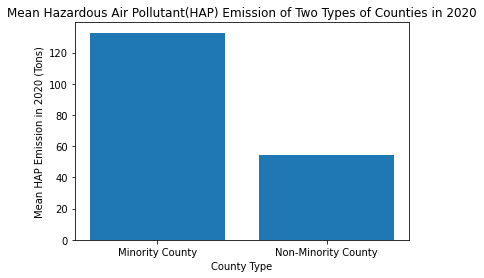

In [109]:
plt.bar(x=["Minority County","Non-Minority County"],height=[np.mean(minority_HAP_df["Emissions (Tons)"]),np.mean(non_minority_HAP_df["Emissions (Tons)"])  ])
plt.xlabel("County Type")
plt.ylabel("Mean HAP Emission in 2020 (Tons)")
plt.title("Mean Hazardous Air Pollutant(HAP) Emission of Two Types of Counties in 2020")

In [110]:
list(np.where(non_minority_HAP_df["Emissions (Tons)"]))[0]

array([   0,    1,    2, ..., 2527, 2528, 2529], dtype=int64)

In [111]:
non_minority_HAP_df["Emissions (Tons)"].isna()

1       False
4       False
9       False
10      False
14      False
        ...  
3259    False
3260    False
3261    False
3262    False
3263     True
Name: Emissions (Tons), Length: 2530, dtype: bool

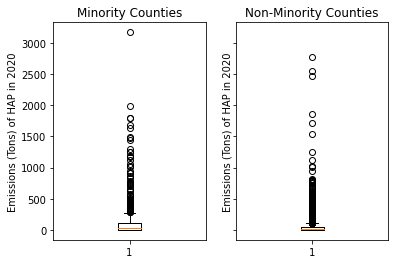

In [112]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2,sharey=True)
ax[1].boxplot(non_minority_HAP_df["Emissions (Tons)"][~np.isnan(non_minority_HAP_df["Emissions (Tons)"])])
ax[0].boxplot(minority_HAP_df["Emissions (Tons)"][~np.isnan(minority_HAP_df["Emissions (Tons)"])])

ax[0].set_title("Minority Counties")
ax[1].set_title("Non-Minority Counties")

ax[1].set_ylabel("Emissions (Tons) of HAP in 2020")
ax[0].set_ylabel("Emissions (Tons) of HAP in 2020")
plt.show()

# Code Criteria: 1 = County with Greater  or Equal Proportion of Black Residents Than the National Average and Annual HAP Emission Greater or Equal to the mean Annual HAP emission of the Counties with Less Proportion of Black Residents Than the National Average

In [113]:
concise_HAP_df = combined_HAP_df[["GEO_ID","Emissions (Tons)"]]

In [114]:
county_list=county_list.merge(concise_HAP_df,on="GEO_ID",how="left")

In [115]:
np.where(county_list["GEO_ID"].duplicated())

(array([112], dtype=int64),)

In [116]:
county_list.iloc[112,:]

STATE                                                    Alaska
GISJOIN                                                G0101150
STATEICP                                                   81.0
STATEFIPS                                                     2
COUNTYFIPS                                                  280
ALLCOUNTIES                                 Wrangell-Petersburg
VARIABLE NAME                                               NaN
GEO_ID                                           0500000US02280
NAME                                                        NaN
Percentage_of_People_Racialized_as_Black                    NaN
Total_Population                                            NaN
Greater_Minority_Proportion                                  No
Emissions (Tons)                                            NaN
Name: 112, dtype: object

In [120]:
county_list[county_list["GEO_ID"]=="0500000US02280"]

,STATE,GISJOIN,STATEICP,STATEFIPS,COUNTYFIPS,ALLCOUNTIES,VARIABLE NAME,GEO_ID,NAME,Percentage_of_People_Racialized_as_Black,Total_Population,Greater_Minority_Proportion,Emissions (Tons)
111,Alaska,G0101130,81.0,2,280,Wrangell City and Borough,NaN,0500000US02280,NaN,NaN,NaN,No,NaN
112,Alaska,G0101150,81.0,2,280,Wrangell-Petersburg,NaN,0500000US02280,NaN,NaN,NaN,No,NaN


In [121]:
county_list

,STATE,GISJOIN,STATEICP,STATEFIPS,COUNTYFIPS,ALLCOUNTIES,VARIABLE NAME,GEO_ID,NAME,Percentage_of_People_Racialized_as_Black,Total_Population,Greater_Minority_Proportion,Emissions (Tons)
0,Alabama,G0100010,41.0,1,10,Autauga,NaN,0500000US01001,"Autauga County, Alabama",20.9,58805,Yes,1252.264152
1,Alabama,G0100030,41.0,1,30,Baldwin,NaN,0500000US01003,"Baldwin County, Alabama",9.0,231767,No,70.381869
2,Alabama,G0100050,41.0,1,50,Barbour,NaN,0500000US01005,"Barbour County, Alabama",48.6,25223,Yes,32.438054
3,Alabama,G0100070,41.0,1,70,Bibb,NaN,0500000US01007,"Bibb County, Alabama",20.8,22293,Yes,14.265290
4,Alabama,G0100090,41.0,1,90,Blount,NaN,0500000US01009,"Blount County, Alabama",2.1,59134,No,0.087035
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253,Wyoming,G5500650,68.0,56,390,Teton,NaN,0500000US56039,"Teton County, Wyoming",0.5,23331,No,1.914397
3254,Wyoming,G5500670,68.0,56,410,Uinta,NaN,0500000US56041,"Uinta County, Wyoming",0.8,20450,No,176.839538
3255,Wyoming,G5500690,68.0,56,430,Washakie,NaN,0500000US56043,"Washakie County, Wyoming",0.7,7685,No,19.244940
3256,Wyoming,G5500710,68.0,56,450,Weston,NaN,0500000US56045,"Weston County, Wyoming",1.0,6838,No,15.722989


In [147]:
county_list["EP.SV3"]=(county_list["Emissions (Tons)"]>np.mean(non_minority_HAP_df["Emissions (Tons)"]))&(county_list["Greater_Minority_Proportion"]=="Yes")
county_list["EP.SV3"]=county_list["EP.SV3"].replace({True:1,False:0})

In [148]:
county_list=county_list.drop(columns=["GEO_ID","NAME","Percentage_of_People_Racialized_as_Black","Total_Population","Greater_Minority_Proportion","Emissions (Tons)"])

In [150]:
county_list.head(5)

,STATE,GISJOIN,STATEICP,STATEFIPS,COUNTYFIPS,ALLCOUNTIES,VARIABLE NAME,EP.SV3
0,Alabama,G0100010,41.0,1,10,Autauga,NaN,1
1,Alabama,G0100030,41.0,1,30,Baldwin,NaN,0
2,Alabama,G0100050,41.0,1,50,Barbour,NaN,0
3,Alabama,G0100070,41.0,1,70,Bibb,NaN,0
4,Alabama,G0100090,41.0,1,90,Blount,NaN,0
